# Aparatment Prices
Using the file "Booli_sold.csv" we can analyze the data on sales of apartments in Ekhagen. 

1. Calculate the price per square meter (ppsqm) for each aparment sold. Ie. add a new variable to your table containing the data representing the price per square meter. 
2. Rank the top 5 most expensive appartments w.r.t ppsqm. Present this in a table. Hint: Use a sort function.
3. What is the avereage ppsqm in Ekhagen?
4. Highlight an aspect of the data that you find interesting. Explain your choice.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Booli_sold.csv") # read file
df

,listPrice,rent,livingArea,rooms,published,constructionYear,objectType,booliId,soldDate,soldPrice,...,location.position.latitude,location.position.longitude,location.position.isApproximate,location.region.municipalityName,location.region.countyName,location.distance.ocean,source.name,source.id,source.type,source.url
0,3995000,4467.0,73.0,3.0,2018-10-15 13:33:18,1935.0,Lägenhet,3263989,2018-11-08,3820000,...,59.371033,18.054057,NaN,Stockholm,Stockholms län,260,MOHV,1901865,Broker,http://www.mohv.se/
1,1995000,1773.0,36.0,1.0,2018-10-05 14:29:28,1968.0,Lägenhet,3256231,2018-10-19,2355000,...,59.371242,18.057821,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
2,5100000,3839.0,81.0,3.0,2018-09-11 13:44:43,1936.0,Lägenhet,3236660,2018-09-27,6110000,...,59.371617,18.054716,NaN,Stockholm,Stockholms län,186,Historiska Hem AB,65645750,Broker,http://historiskahem.se/
3,5495000,4483.0,107.0,4.0,2018-08-25 02:56:56,1936.0,Lägenhet,3224374,2018-09-06,8050000,...,59.371480,18.053880,NaN,Stockholm,Stockholms län,218,Notar,1566,Broker,http://www.notar.se/
4,1995000,1696.0,29.0,1.0,2018-06-15 17:16:19,1936.0,Lägenhet,3185496,2018-06-18,2400000,...,59.372160,18.053542,True,Stockholm,Stockholms län,166,Mäklarhuset,204,Broker,http://www.maklarhuset.se/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1495000,1388.0,26.0,1.0,2012-10-20 07:36:37,1935.0,Lägenhet,1297784,2012-11-30,1475000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
154,2245000,2455.0,50.0,2.0,2012-10-19 15:32:58,1935.0,Lägenhet,1296874,2012-10-27,2245000,...,59.372272,18.055659,True,Stockholm,Stockholms län,101,Notar,1566,Broker,http://www.notar.se/
155,1450000,1072.0,23.0,1.0,2012-09-14 05:10:08,1936.0,Lägenhet,1270599,2012-10-22,1450000,...,59.371194,18.053552,NaN,Stockholm,Stockholms län,255,Notar,1566,Broker,http://www.notar.se/
156,2495000,2748.0,56.0,3.0,2012-09-21 12:19:37,1935.0,Lägenhet,1276232,2012-10-09,2200000,...,59.372759,18.054634,True,Stockholm,Stockholms län,70,Notar,1566,Broker,http://www.notar.se/


## Calculating ppsqm

In [3]:
df["ppsqm"] = round(df["soldPrice"] / df["livingArea"])

print("The price per square meter is:\n" + str(df["ppsqm"]))

The price per square meter is:
0      52329.0
1      65417.0
2      75432.0
3      75234.0
4      82759.0
        ...   
153    56731.0
154    44900.0
155    63043.0
156    39286.0
157    43600.0
Name: ppsqm, Length: 158, dtype: float64


## 5 most expensive sorted

In [4]:
most_expensive_sorted = df.nlargest(5, 'ppsqm')[['soldPrice', 'livingArea', 'ppsqm']]
most_expensive_sorted['ppsqm'] = most_expensive_sorted['ppsqm'].round().astype(int) # convert to int and round for cleaner appereance


most_expensive_sorted = most_expensive_sorted.rename(columns={ # rename columns for a cleaner appearance
    'soldPrice': 'Sold Price (SEK)',
    'livingArea': 'Living Area (sqm)',
    'ppsqm': 'Price per sqm (SEK)'
})

# Print the table
print("The 5 most expensive apartments:\n" + str(most_expensive_sorted))


The 5 most expensive apartments:
    Sold Price (SEK)  Living Area (sqm)  Price per sqm (SEK)
67           2500000               24.0               104167
50           2450000               24.0               102083
54           2300000               23.0               100000
34           2210000               25.0                88400
55           2300000               26.9                85502


## Average ppsqm Ekhagen

In [5]:
average_ppsqm = int(df["ppsqm"].mean())
print("The average price per square meter in Ekhagen is: " + str(average_ppsqm) + " kr")

The average price per square meter in Ekhagen is: 58759 kr


## Interesting aspect of the data
Something that could be of interest is the age of construction and how it corresponds to the sold price. We can do this by plotting boxplots of respective construction years, showcasing the price (y-axis) and age of construction (x-axis).

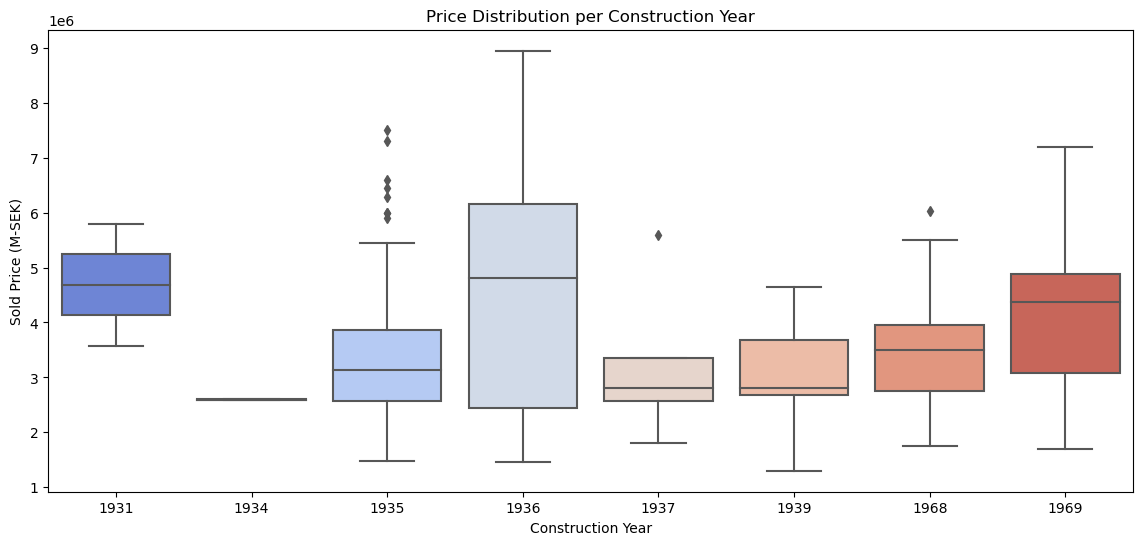

In [33]:
df_age_price = df[["soldPrice", "constructionYear"]] # keep only the interesting columns
df_age_price_cleaned = df_age_price.dropna()

df_cleaned = df[["constructionYear", "soldPrice"]].dropna().astype(int) # astype int for cleaner x axis

df_grouped = df_cleaned.groupby("constructionYear")["soldPrice"].mean() # group by year and calculate mean

plt.figure(figsize=(14, 6))
sns.boxplot(x="constructionYear", y="soldPrice", data=df_cleaned, palette="coolwarm")
plt.title("Price Distribution per Construction Year")
plt.xlabel("Construction Year")
plt.ylabel("Sold Price (M-SEK)")
plt.show()



In [32]:
construction_year_counts = df_cleaned.groupby("constructionYear").size()

print(construction_year_counts)

constructionYear
1931     2
1934     2
1935    80
1936    17
1937     5
1939     8
1968    19
1969    11
dtype: int64


Showcasing that 1936 has the highest median. This could however be a consequence of the difference in amount of apartments sold respective years. Given that 1935 has by far the most built apartments the data may not show the real picture however it still indicates that older apartments are in general more expensive and could perhaps be used a base for a hypothesis that early 20th century apartments do cost more which is often a stereotype in Stockholm due to the "charm" and "aesthetics" of said apartments. 

# The Swedish Election of 2018
Using data provided to us in the file "2018_R_per_kommun.csv" we will now analyze the following:

1. Calculate the total number of legitimate votes (Giltiga Röster) in Stockholm during the election. That is, sum upp the number of legitimate votes for all municipalities (kommun) in Stockholm.
2. In which municipality did the social democratic party (Social demokraterna, S) garner the hightest voting percentage?
3. Rank the (3) municipialities in Sweden with highest participation (valdeltagande). Present this in the form of a table.

In [7]:
df2 = pd.read_csv("2018_R_per_kommun.csv", sep=";", decimal=",") # read using separator ;
stockholm_df2 = df2[df2['LÄNSNAMN'] == 'Stockholms län'] # make variable composed of solely the stockholms län column
total_legitimate_votes = stockholm_df2["RÖSTER GILTIGA"].sum() 

print("The total number of legitimate votes in Stockholm during the election is: " + str(total_legitimate_votes))

The total number of legitimate votes in Stockholm during the election is: 1426237


In [8]:
df2["S"] = pd.to_numeric(df2["S"], errors="coerce")
muni_highest_S_voting_percentage = df2.nlargest(1, "S")[['LÄNSNAMN', 'KOMMUNNAMN', 'S']]

print("The municipality with the highest voting percentage in the political party S (Social Demokraterna): \n" + str(muni_highest_S_voting_percentage))

The municipality with the highest voting percentage in the political party S (Social Demokraterna): 
          LÄNSNAMN KOMMUNNAMN      S
188  Värmlands län   Munkfors  52.18


In [9]:
df2["VALDELTAGANDE"] = pd.to_numeric(df2["VALDELTAGANDE"], errors="coerce")
top_3_highest_muni_participation = df2.nlargest(3, "VALDELTAGANDE")[['KOMMUNNAMN', 'VALDELTAGANDE']]

print("The 3 municipalities in Sweden with highest participation in political voting (valdeltagande) are \n" + str(top_3_highest_muni_participation))

The 3 municipalities in Sweden with highest participation in political voting (valdeltagande) are 
    KOMMUNNAMN  VALDELTAGANDE
103      Lomma          93.86
59        Habo          93.35
98    Vellinge          93.13


# Predicting Strokes
Our task is to draw a conclusion using a suitable plot based on the file "stroke-data.csv" that was given to us or more specifically the data provided to us by https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset - Kaggle: Stroke Prediction Dataset. We will do this by plotting a line chart showcasing whether some of the common factors of stroke have a correlation with infact having a stroke. These factors are age, gender, smoking, heart disease and BMI. 

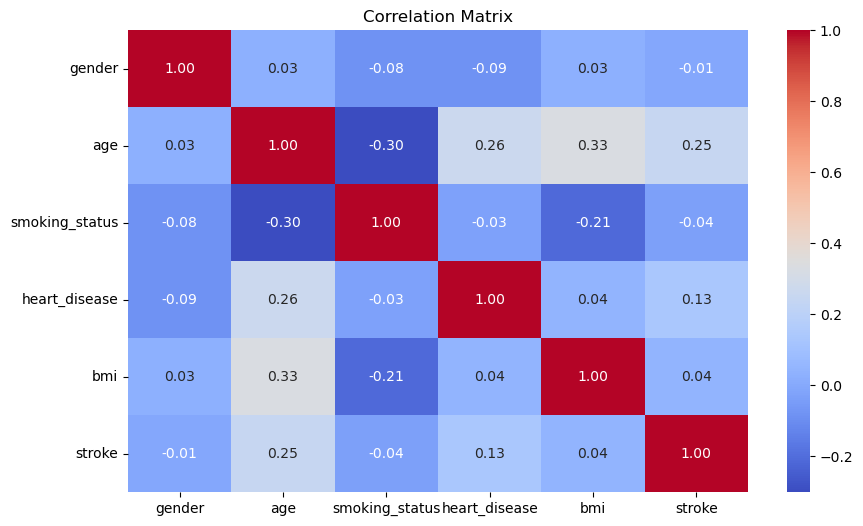

In [10]:
df3 = pd.read_csv('stroke-data.csv')

# select relevant columns and redefine df3 as made up of said columns
df3 = df3[['gender', 'age', 'smoking_status', 'heart_disease', 'bmi', 'stroke']]

# map gender and smoking status to numerical values
df3['gender'] = df3['gender'].map({
    'Male': 0, 
    'Female': 1, 
    'Other': 2
})
df3['smoking_status'] = df3['smoking_status'].map({
    'never smoked': 0,
    'formerly smoked': 1,
    'smokes': 2,
    'Unknown': 3
})

# compute the correlation matrix
corr_matrix = df3.corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True) # annotate with 2 decimals with the bar to the right being active
plt.title('Correlation Matrix')
plt.show()


Looking at the bottom row, ie. "stroke" we come to the possible conclusion that age is the main factor of stroke since it has the highest correlation coefficient with respect to having stroke can be drawn due to having the highest correlation coefficient, somewhere around 0.25. While we perhaps cannot draw a concrete conclusion we can say that there is certainly a connection between being elderly and having a stroke. We can also see that heart disease and bmi have some weak correlation, 0.13 and 0.04 respectively while gender and smoking status have a negative correlation-coefficient, -0.01 and -0.04 respectively which could rouhly imply no correlation due to the coefficient being so small that we can consider this a fault of the amount of samples we have. 